In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.patheffects as PathEffects

In [2]:
df = pd.read_csv('nFCC_vs_nTCC_tol_5.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.Model = [model.replace('.mat', '') for model in df.Model]
df

,Model,nFCC,nTCC
0,STM_v1_0,948,958
1,e_coli_core,8,8
2,iAB_RBC_283,16,22
3,iAF1260,850,859
4,iAF1260b,834,845
...,...,...,...
94,iYO844,593,593
95,iYS1720,983,995
96,iYS854,526,529
97,iZ_1308,1075,1086


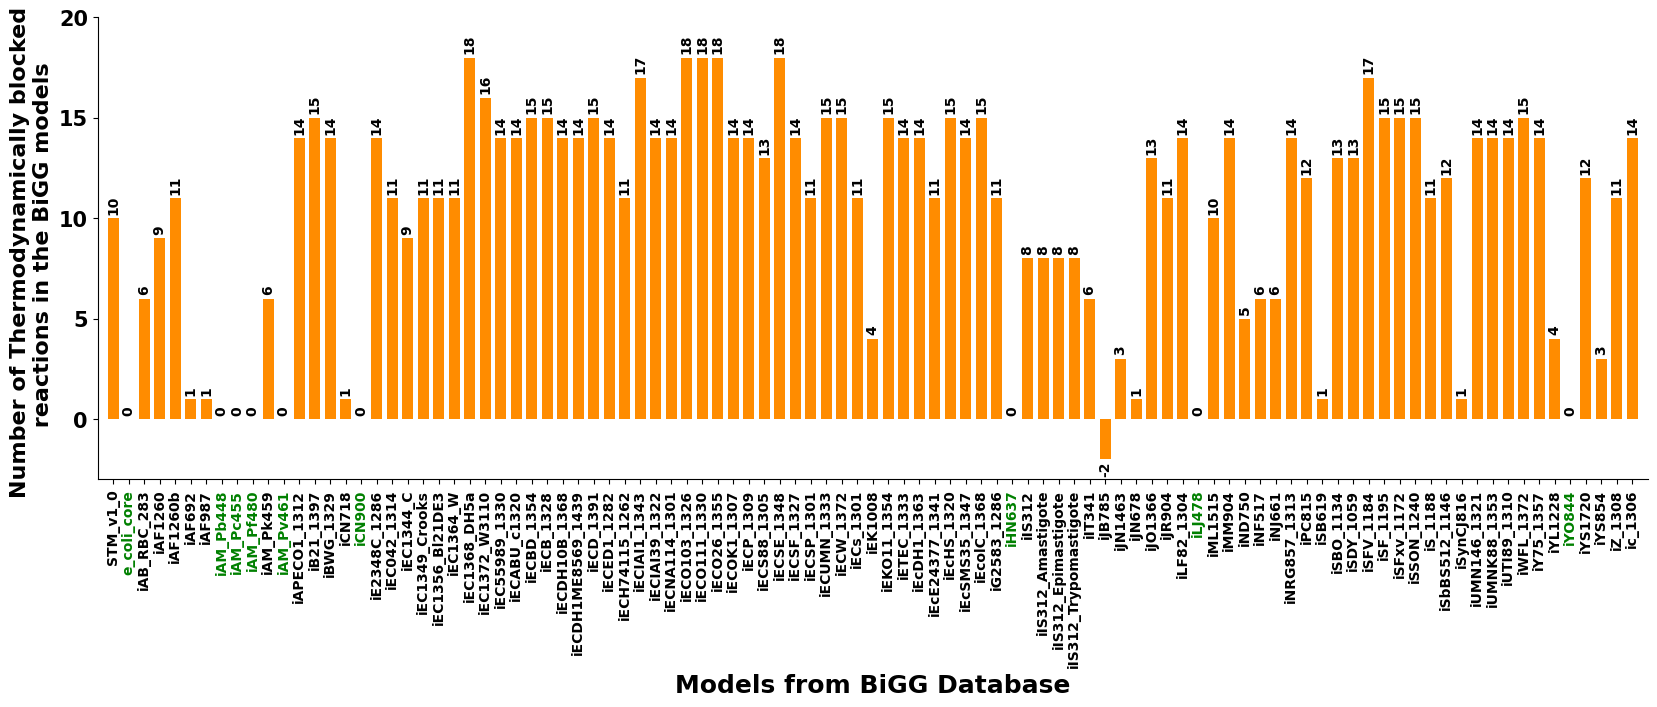

In [7]:
# plotting a bar for the thermodynamically blocked reactions
plt.figure(figsize=(20,6))
barWidth = 0.7
bars = df['nTCC']- df['nFCC']
r1 = np.arange(len(bars))
plt.bar(r1, bars, color='darkorange', width=barWidth, label='ThermOptCC')
plt.xlabel('Models from BiGG Database', fontsize=18, fontweight='bold')
# coloring the xticks for which the bar size is 0
for i, bar in enumerate(bars):
    if bar<0:
        plt.text(i, bar-0.1, bar, color='black', ha='center', va='top', fontsize=10, fontweight='bold', rotation=90)
    else:
        plt.text(i, bar+0.2, bar, color='black', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=90)
plt.xticks([r for r in range(len(bars))], df['Model'], rotation=90, fontweight='bold', fontsize=10)
# coloring the xticks
for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if bars[i]==0:
        t.set_color('green')
    else:
        t.set_color('black')

plt.yticks(fontweight='bold',fontsize=15)
# entering a newline character in the ylabel
plt.ylabel(f'Number of Thermodynamically blocked \n reactions in the BiGG models', fontsize=16, fontweight='bold')
plt.ylim(-3, 20)
plt.xlim(-1, len(bars))
# removing the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('No_of_T_Blkd_rxns.pdf', bbox_inches='tight')

In [9]:
df = pd.read_csv('TICBefAft_tol_5.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.Model = [model.replace('.mat', '') for model in df.Model]
df

,Model,nTICrxnsAft,nTICrxnsBef,nTICsBef,nTICsAft
0,STM_v1_0,20,52,34,19
1,e_coli_core,2,2,1,1
2,iAB_RBC_283,3,9,5,1
3,iAF1260,39,68,38,20
4,iAF1260b,45,76,45,25
...,...,...,...,...,...
94,iYO844,13,21,13,9
95,iYS1720,73,114,71,49
96,iYS854,37,46,44,36
97,iZ_1308,78,110,76,53


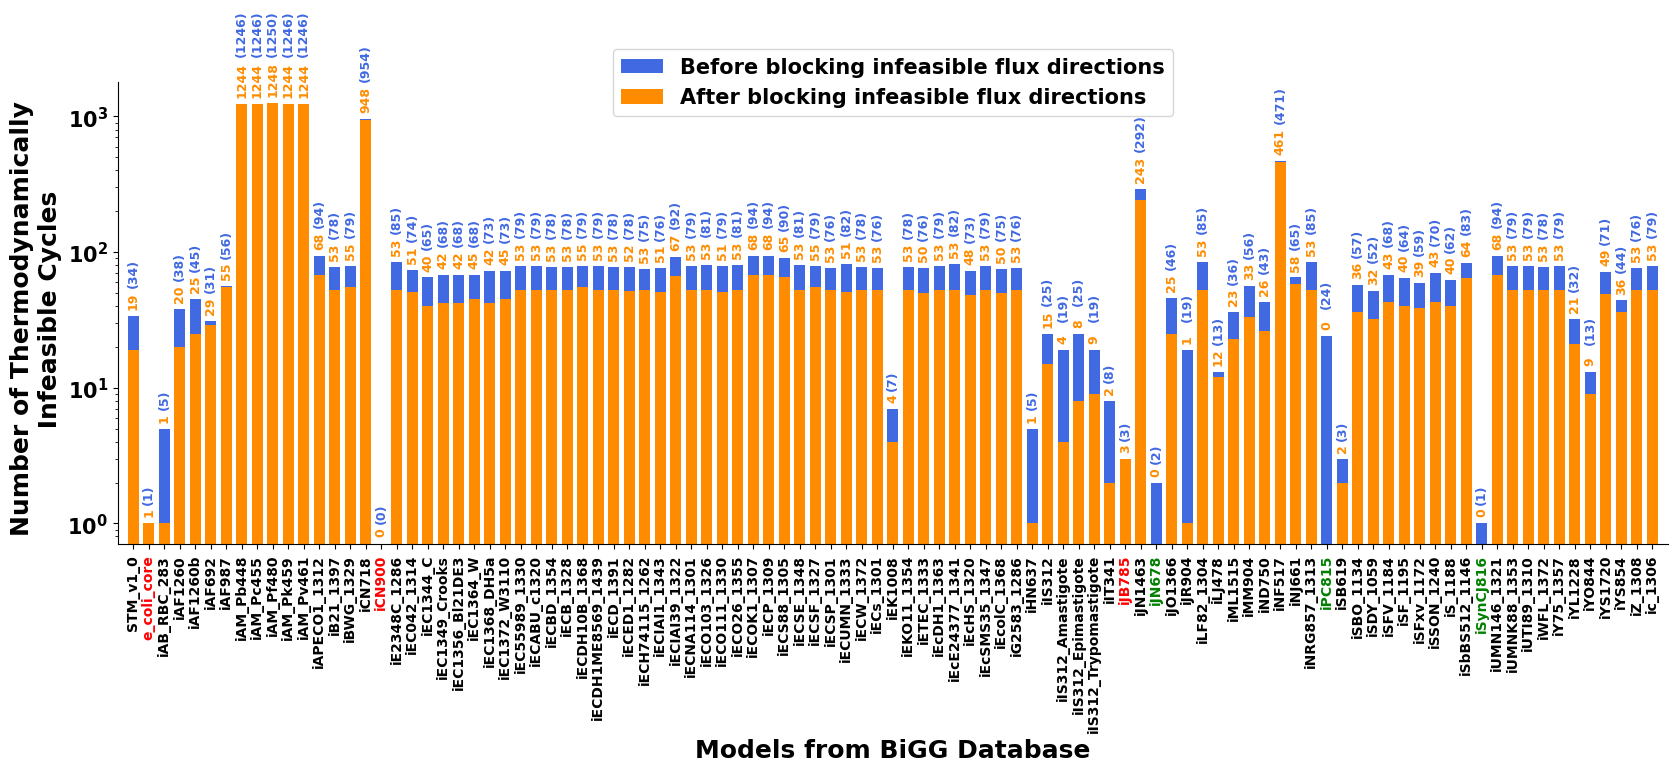

In [10]:
# plotting a stacked bar plot
fig,ax = plt.subplots(figsize=(20,6))
barWidth = 0.7
bars1 = df['nTICsBef']
bars2 = df['nTICsAft']
r1 = np.arange(len(bars1))
plt.bar(r1, bars1, color='royalblue', width=barWidth, label='Before blocking infeasible flux directions')
plt.bar(r1, bars2, color='darkorange', width=barWidth, label='After blocking infeasible flux directions')
# log scling the y axis
plt.yscale('log')
plt.xlabel('Models from BiGG Database', fontsize=18, fontweight='bold')
plt.ylabel(f'Number of Thermodynamically \n Infeasible Cycles', fontsize=18, fontweight='bold')

# coloring the xticks for which the bar size is 0
for i, bar1 in enumerate(bars1):
    if bar1==0:
        plt.text(i, 0.8, bars2[i], color='darkorange', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)
        plt.text(i, 1, '('+str(bars1[i])+')', color='royalblue', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)
    else:
        plt.text(i, 10**(np.log10(bar1+0.001)+0.05), bars2[i], color='darkorange', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)
        p = 0.07*(len(str(int(bar1)))+1)
        # writing the text in a log scaled y axis
        plt.text(i, 10**(np.log10(bar1+0.001)+p), '('+str(bars1[i])+')', color='royalblue', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)
plt.xlim(-1, len(bars1))
plt.xticks([r for r in range(len(bars1))], df['Model'], rotation=90, fontweight='bold', fontsize=10)
plt.yticks(fontweight='bold',fontsize=15)
# coloring the xticks
for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if bars1[i]==bars2[i]:
        t.set_color('red')
    elif bars1[i]>0 and bars2[i]==0:
        t.set_color('green')
    else:
        t.set_color('black')
# increasing the font size of the legend
# positioning the legend
plt.legend(prop={'weight': 'bold','size': 15},bbox_to_anchor=(0.5, 1), loc='center')
# removing the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('No_of_TICs_befaft_TOCC.pdf', bbox_inches='tight')
